In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/credit-risk/train.csv"
df_train = pd.read_csv(url)

In [3]:
df_train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,25,43200,RENT,NaN,VENTURE,B,1200,9.91,0,0.03,N,4
1,27,98000,RENT,3.0,EDUCATION,C,11750,13.47,0,0.12,Y,6
2,22,36996,RENT,5.0,EDUCATION,A,10000,7.51,0,0.27,N,4
3,24,26000,RENT,2.0,MEDICAL,C,1325,12.87,1,0.05,N,4
4,29,53004,MORTGAGE,2.0,HOMEIMPROVEMENT,A,15000,9.63,0,0.28,N,10
...,...,...,...,...,...,...,...,...,...,...,...,...
26059,36,150000,MORTGAGE,8.0,EDUCATION,A,3000,7.29,0,0.02,N,17
26060,23,48000,RENT,1.0,VENTURE,A,4325,5.42,0,0.09,N,4
26061,22,60000,RENT,0.0,MEDICAL,B,15000,11.71,0,0.25,N,4
26062,30,144000,MORTGAGE,12.0,PERSONAL,C,35000,12.68,0,0.24,N,8


In [10]:
table = df_train.groupby(['loan_status']).aggregate({'person_age': 'mean', 'person_emp_length': 'mean'})
print(table)

             person_age  person_emp_length
loan_status                               
0             27.816506           4.954096
1             27.439076           4.159375


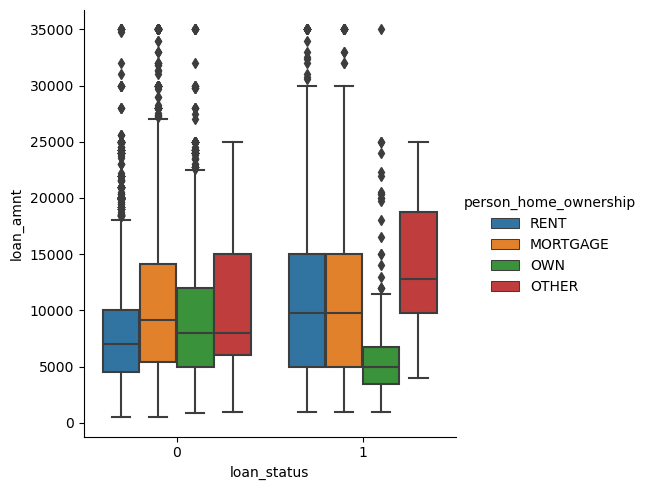

In [51]:
import seaborn as sns

sns.catplot(data=df_train, x="loan_status", y="loan_amnt", hue="person_home_ownership", kind="box")

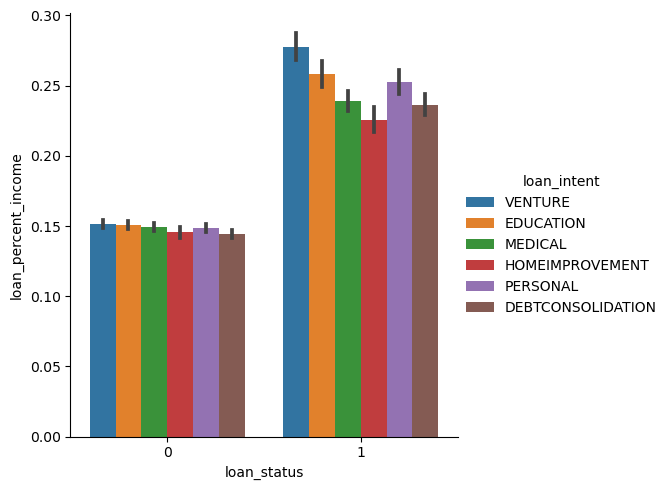

In [53]:
sns.catplot(data=df_train, x="loan_status", y="loan_percent_income", hue="loan_intent", kind="bar")

Choose your features, estimate new ones if needed, and fit a score-based machine learning model to the data. My suggestion is LogisticRegression. Once you have fit a logistic regression model, w the weight vector is stored as the attribute model.coef_.

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_train["loan_status"])

def prepare_data(df_train):
  # df_train = df_train(["person_age", "person_income", "loan_percent_income", "cb_person_cred_hist_length", "person_emp_length", "loan_intent", "person_home_ownership", "loan_amnt", "loan_int_rate"])
  df_train = df_train.dropna()
  y = df_train["loan_status"].to_numpy()
  df_train = df_train.drop(["loan_status", "loan_grade"], axis = 1)
  df_train["cb_person_default_on_file"] = le.fit_transform(df_train["cb_person_default_on_file"])
  df_train["loan_intent"] = le.fit_transform(df_train["loan_intent"])  
  df_train = pd.get_dummies(df_train)
  return df_train, y

X_train, y_train = prepare_data(df_train)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
import pandas as pd 
from itertools import combinations

home_ownership_cols = [col for col in X_train.columns if 'person_home_ownership' in col]
print(home_ownership_cols)
bestLRScore = 0.0
bestLRCols=[]

for triple in combinations(X_train.columns, 3):
    print(triple)
    cols = list(triple)
    
    if any( col in home_ownership_cols for col in cols):
        cols += home_ownership_cols
        
    #LogisticRegression
    LR = LogisticRegression()
    
    LRScore = cross_val_score(LR, X_train[cols], y_train, cv=5).mean()
    
    if LRScore >= bestLRScore :
      bestLRScore = LRScore
      bestLRCols = cols

print(bestLRScore)
print(bestLRCols)        
    
LR = LogisticRegression(random_state=0)
LR.fit(X_train[bestLRCols], y_train)
weights = LR.coef_

print(weights)
# W = pd.DataFrame({"Feature": X_train[bestLRCols], "Value": weights[0]})
# print(W)

['person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT']


/Users/lindseyschweitzer/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/lindseyschweitzer/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

0.8489539327556717
['person_age', 'loan_percent_income', 'person_home_ownership_MORTGAGE', 'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT']
[[-4.40967254e-03  8.25436217e+00 -2.68412756e-01 -2.68412756e-01
   8.87470311e-02 -1.62256717e+00  4.83031411e-01]]


/Users/lindseyschweitzer/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
import numpy as np


def linear_score(X, w):
    return X@w.T


s = linear_score(X_train[bestLRCols], weights)

ROC curve which shows the TPR and FPR for many different values of the threshold t. We want to find a point where TPR is maximized and FPR is minimized.

In [20]:
preds

,0
1,True
2,True
3,True
4,True
6,True
...,...
26059,True
26060,True
26061,True
26062,True


In [31]:
((preds.reshape(-1) == 1) * (y_train == 0))

array([ True,  True, False, ...,  True,  True, False])

In [29]:
i = 0
t = T[i]
preds    = s >= t
FPR[i]   = ((preds== 1) * (y_train == 0)).sum() / (y_train == 0).sum()
TPR[i]   = ((preds== 1) * (y_train == 1)).sum() / (y_train == 1).sum()

preds.shape
y_train.shape

(22907,)

100%|██████████| 101/101 [00:00<00:00, 3162.39it/s]


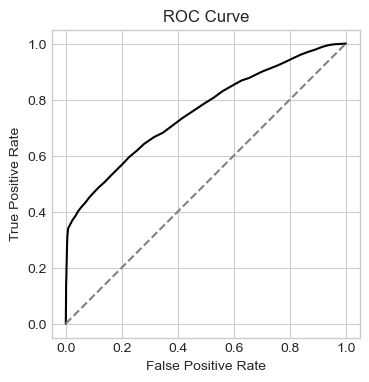

In [32]:
from matplotlib import pyplot as plt
import tqdm
np.set_printoptions(precision = 3)
plt.style.use('seaborn-v0_8-whitegrid')

fig, ax = plt.subplots(1, 1, figsize = (6, 4))

num_thresholds = 101

FPR = np.zeros(num_thresholds)
TPR = np.zeros(num_thresholds)
T = np.linspace(s.min()-0.1, s.max()+0.1, num_thresholds)
s    = linear_score(X_train[bestLRCols], weights).to_numpy().reshape(-1)

for i in tqdm.trange(num_thresholds):
    t = T[i]
    preds    = s >= t
    FPR[i]   = ((preds== 1) * (y_train == 0)).sum() / (y_train == 0).sum()
    TPR[i]   = ((preds== 1) * (y_train == 1)).sum() / (y_train == 1).sum()


ax.plot(FPR, TPR, color = "black")
ax.plot([0,1], [0,1], linestyle="--", color = "grey")
ax.set_aspect('equal')

labs = ax.set(xlabel = "False Positive Rate", ylabel = "True Positive Rate", title = "ROC Curve")

In [24]:
FPR

array([2.291e+04, 2.291e+04, 2.290e+04, 2.287e+04, 2.283e+04, 2.278e+04,
       2.271e+04, 2.265e+04, 2.260e+04, 2.253e+04, 2.246e+04, 2.238e+04,
       2.232e+04, 2.224e+04, 2.215e+04, 2.201e+04, 2.174e+04, 2.134e+04,
       2.087e+04, 2.032e+04, 1.980e+04, 1.924e+04, 1.868e+04, 1.815e+04,
       1.760e+04, 1.711e+04, 1.661e+04, 1.611e+04, 1.557e+04, 1.491e+04,
       1.416e+04, 1.348e+04, 1.269e+04, 1.184e+04, 1.111e+04, 1.031e+04,
       9.601e+03, 8.941e+03, 8.195e+03, 7.602e+03, 6.994e+03, 6.508e+03,
       5.959e+03, 5.486e+03, 5.015e+03, 4.503e+03, 4.102e+03, 3.710e+03,
       3.369e+03, 3.055e+03, 2.758e+03, 2.525e+03, 2.264e+03, 2.044e+03,
       1.826e+03, 1.628e+03, 1.434e+03, 1.232e+03, 1.095e+03, 9.900e+02,
       8.750e+02, 7.940e+02, 6.860e+02, 6.100e+02, 5.190e+02, 4.520e+02,
       3.900e+02, 3.340e+02, 2.950e+02, 2.640e+02, 2.310e+02, 1.880e+02,
       1.650e+02, 1.400e+02, 1.120e+02, 9.100e+01, 7.000e+01, 6.100e+01,
       5.100e+01, 4.500e+01, 4.200e+01, 3.900e+01, 

In [41]:
(X_train["loan_amnt"]*(1 + 0.25*X_train["loan_int_rate"])**10 - X_train["loan_amnt"]).shape

(22907,)

The loan cost depends on the loan amount  and the loan interest rate. The gain cost, or the cost of a true negative (negative meaning not defaulting on a loan) can be calculated as ..... and the loss cost, or the cost of a false negative (bank giving someone a loan who defualts) can be calculated as.....

  0%|          | 0/101 [00:00<?, ?it/s]

100%|██████████| 101/101 [00:00<00:00, 850.95it/s]

cost_of_FN=0.0
cost_of_FN=0.0
cost_of_FN=0.0
cost_of_FN=0.0
cost_of_FN=-13327.403285959866
cost_of_FN=-14583.376765748324
cost_of_FN=-14583.376765748324
cost_of_FN=-16805.923648703385
cost_of_FN=-22482.44490827026
cost_of_FN=-22482.44490827026
cost_of_FN=-27964.803844506354
cost_of_FN=-35260.381916499755
cost_of_FN=-35260.381916499755
cost_of_FN=-38975.012640369874
cost_of_FN=-43139.77954869473
cost_of_FN=-47780.84504223136
cost_of_FN=-69643.84254223903
cost_of_FN=-115116.27332936636
cost_of_FN=-277118.6696255777
cost_of_FN=-426047.56263737904
cost_of_FN=-601070.3893013194
cost_of_FN=-840355.0628529777
cost_of_FN=-1112761.662973634
cost_of_FN=-1378186.755969824
cost_of_FN=-1612004.5955496172
cost_of_FN=-1874057.4694512952
cost_of_FN=-2176512.810226457
cost_of_FN=-2484760.7374268426
cost_of_FN=-2678377.4600521177
cost_of_FN=-3048036.2655834276
cost_of_FN=-3430632.4221999273
cost_of_FN=-3828790.3175629014
cost_of_FN=-4367267.289349237
cost_of_FN=-4855274.91378687
cost_of_FN=-5332091.5218

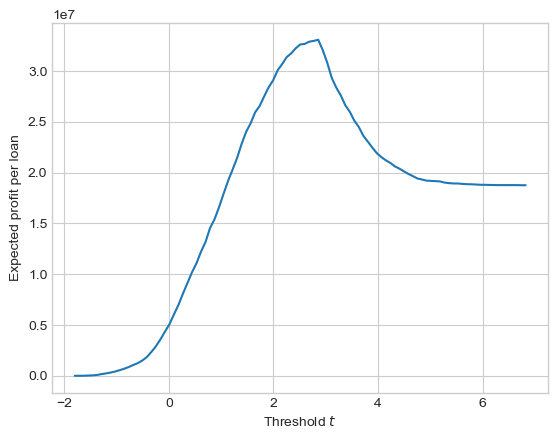

In [64]:
from matplotlib import pyplot as plt
np.set_printoptions(precision = 3)
num_thresholds = 101

gains = np.zeros(num_thresholds)

T = np.linspace(s.min()-0.1, s.max()+0.1, num_thresholds)
s    = linear_score(X_train[bestLRCols], weights).to_numpy().reshape(-1)

gain_of_TN = 0
cost_of_FN = 0

for i in tqdm.trange(num_thresholds):
    t = T[i]
    preds    = s >= t
    
    gain_of_TN = ((((preds == 0) * (y_train == 0))) * (X_train["loan_amnt"]*(1 + 0.25*(X_train["loan_int_rate"]/100))**10 - X_train["loan_amnt"])).sum()
     
    cost_of_FN = ((((preds == 0) * (y_train == 1))) * (X_train["loan_amnt"]*(1 + 0.25*(X_train["loan_int_rate"]/100))**3 - 1.7*X_train["loan_amnt"])).sum()
    # print(f"{cost_of_FN=}")
    gains[i] =  gain_of_TN + cost_of_FN

plt.plot(T, gains)
labs = plt.gca().set(xlabel = r"Threshold $t$", ylabel = "Expected profit per loan")

In [81]:
max_y = np.argmax(gains)
t = T[max_y]

In [82]:
url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/credit-risk/test.csv"
df_test = pd.read_csv(url)

X_test, y_test = prepare_data(df_test)

In [ ]:
from matplotlib import pyplot as plt
np.set_printoptions(precision = 3)
num_thresholds = 101

gains = np.zeros(num_thresholds)

T = np.linspace(s.min()-0.1, s.max()+0.1, num_thresholds)
s    = linear_score(X_train[bestLRCols], weights).to_numpy().reshape(-1)

gain_of_TN = 0
cost_of_FN = 0

for i in tqdm.trange(num_thresholds):
    t = T[i]
    preds    = s >= t
    
    gain_of_TN = ((((preds == 0) * (y_train == 0))) * (X_train["loan_amnt"]*(1 + 0.25*(X_train["loan_int_rate"]/100))**10 - X_train["loan_amnt"])).sum()
     
    cost_of_FN = ((((preds == 0) * (y_train == 1))) * (X_train["loan_amnt"]*(1 + 0.25*(X_train["loan_int_rate"]/100))**3 - 1.7*X_train["loan_amnt"])).sum()
    # print(f"{cost_of_FN=}")
    gains[i] =  gain_of_TN + cost_of_FN

plt.plot(T, gains)
labs = plt.gca().set(xlabel = r"Threshold $t$", ylabel = "Expected profit per loan")

In [88]:
s    = linear_score(X_test[bestLRCols], weights).to_numpy().reshape(-1)
preds = s >= t

# compute error rates
gain_of_TN = ((((preds == 0) * (y_test == 0))) * (X_test["loan_amnt"]*(1 + 0.25*(X_test["loan_int_rate"]/100))**10 - X_test["loan_amnt"])).sum()
cost_of_FN = ((((preds == 0) * (y_test == 1))) * (X_test["loan_amnt"]*(1 + 0.25*(X_test["loan_int_rate"]/100))**3 - 1.7*X_test["loan_amnt"])).sum()

# compute the expected gain
gain = gain_of_TN + cost_of_FN
gain

7931919.35735091